# Critica de peliculas

Comenzamos con las importaciones de lo que vamos a necesitar para manejar los datos 

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Ahora, crearemos el dataset

In [29]:
df_peliculas = pd.DataFrame({ 'Valoracion': [5,4,3,2,1,0], 'Votos': [40, 99, 145, 133, 96, 40]})
df_peliculas

,Valoracion,Votos
0,5,40
1,4,99
2,3,145
3,2,133
4,1,96
5,0,40


Continuaremos creando la grafica de campana

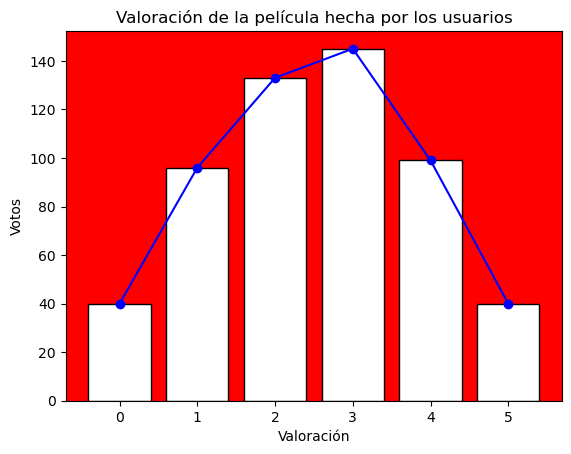

In [30]:
plt.bar(df_peliculas['Valoracion'], df_peliculas['Votos'], color = 'white', edgecolor = 'black')
plt.gca().set_facecolor('red')
plt.plot(df_peliculas['Valoracion'], df_peliculas['Votos'], color = 'blue', marker = 'o')
plt.xlabel('Valoración')
plt.ylabel('Votos')
plt.title('Valoración de la película hecha por los usuarios')
plt.show()


los dos siguientes pasos seran hacer un dataset cuyos datos seran los resultados del producto de la valoracion por los votos y calcular tambien las medias 

In [31]:
df_producto = df_peliculas['Valoracion'] * df_peliculas['Votos']
df_producto

0    200
1    396
2    435
3    266
4     96
5      0
dtype: int64

In [32]:
#ahora calculamos la media
media = df_producto.sum() / df_peliculas['Votos'].sum()
media

2.518987341772152

Tras haber calculado la media crearemos un nuevo dataset cdonde saldra calculada la varianza

In [33]:
df_varianza = (df_peliculas['Valoracion'] - media)**2 * df_peliculas['Votos']
df_varianza

0    246.216952
1    217.146451
2     33.549111
3     35.823266
4    221.502964
5    253.811889
dtype: float64

Por último vamos a añadir la desviacion tipica 

In [34]:
df_desviacion_tipica = np.sqrt(df_varianza.sum() / df_peliculas['Votos'].sum())
df_desviacion_tipica

1.3501393893020874

In [35]:
# ahora juntaremos en un dataframe los datos de la tabla de frecuencias, la varianza, la media y la desviacion tipica
df_peliculas['Producto'] = df_producto
df_peliculas['Varianza'] = df_varianza
df_peliculas['Desviacion tipica'] = df_desviacion_tipica
df_peliculas

,Valoracion,Votos,Producto,Varianza,Desviacion tipica
0,5,40,200,246.216952,1.350139
1,4,99,396,217.146451,1.350139
2,3,145,435,33.549111,1.350139
3,2,133,266,35.823266,1.350139
4,1,96,96,221.502964,1.350139
5,0,40,0,253.811889,1.350139


Porcentaje del 68%

In [41]:
porcentaje68 = 0.68
limite_inferior = int (media - df_desviacion_tipica)
limite_superior = int (media + df_desviacion_tipica)
num_observaciones = observaciones = df_peliculas[(df_peliculas['Valoracion'] >= limite_inferior) & (df_peliculas['Valoracion'] <= limite_superior)]['Votos'].sum()


In [46]:
print("El intervalo de confianza del 68% es: [", limite_inferior, ",", limite_superior, "]")
print("El numero total es de: ", df_peliculas['Votos'].sum(), "observaciones")
print("El número de observaciones que se encuentran en el intervalo de confianza del 68% es: ", num_observaciones)
print("El porcentaje de observaciones que se encuentran en el intervalo de confianza del 68% es: ", 100*num_observaciones / df_peliculas['Votos'].sum(), "%")

El intervalo de confianza del 68% es: [ 1 , 3 ]
El numero total es de:  553 observaciones
El número de observaciones que se encuentran en el intervalo de confianza del 68% es:  374
El porcentaje de observaciones que se encuentran en el intervalo de confianza del 68% es:  67.63110307414105 %


Porcentaje del 95%

In [47]:
porcentaje95 = 0.95
limite_inferior = int (media - 2 * df_desviacion_tipica)
limite_superior = int (media + 2 * df_desviacion_tipica)
num_observaciones = observaciones = df_peliculas[(df_peliculas['Valoracion'] >= limite_inferior) & (df_peliculas['Valoracion'] <= limite_superior)]['Votos'].sum()

In [48]:
print("El intervalo de confianza del 95% es: [", limite_inferior, ",", limite_superior, "]")
print("El numero total es de: ", df_peliculas['Votos'].sum(), "observaciones")
print("El número de observaciones que se encuentran en el intervalo de confianza del 95% es: ", num_observaciones)
print("El porcentaje de observaciones que se encuentran en el intervalo de confianza del 95% es: ", 100*num_observaciones / df_peliculas['Votos'].sum(), "%")

El intervalo de confianza del 95% es: [ 0 , 5 ]
El numero total es de:  553 observaciones
El número de observaciones que se encuentran en el intervalo de confianza del 95% es:  553
El porcentaje de observaciones que se encuentran en el intervalo de confianza del 95% es:  100.0 %


Porcentaje del 97%

In [49]:
porcentaje97 = 0.97
limite_inferior = int (media - 3 * df_desviacion_tipica)
limite_superior = int (media + 3 * df_desviacion_tipica)
num_observaciones = observaciones = df_peliculas[(df_peliculas['Valoracion'] >= limite_inferior) & (df_peliculas['Valoracion'] <= limite_superior)]['Votos'].sum()

In [50]:
print("El intervalo de confianza del 97% es: [", limite_inferior, ",", limite_superior, "]")
print("El numero total es de: ", df_peliculas['Votos'].sum(), "observaciones")
print("El número de observaciones que se encuentran en el intervalo de confianza del 97% es: ", num_observaciones)
print("El porcentaje de observaciones que se encuentran en el intervalo de confianza del 97% es: ", 100*num_observaciones / df_peliculas['Votos'].sum(), "%")


El intervalo de confianza del 97% es: [ -1 , 6 ]
El numero total es de:  553 observaciones
El número de observaciones que se encuentran en el intervalo de confianza del 97% es:  553
El porcentaje de observaciones que se encuentran en el intervalo de confianza del 97% es:  100.0 %
